In [1]:
#| default_exp losses.pytorch

In [2]:
#| hide
%load_ext autoreload
%autoreload 2

# PyTorch Losses

> NeuralForecast contains a collection PyTorch Loss classes aimed to be used during the models' optimization. The most important train signal is the forecast error, which is the difference between the observed value $y_{\tau}$ and the prediction $\hat{y}_{\tau}$, at time $y_{\tau}$:$$e_{\tau} = y_{\tau}-\hat{y}_{\tau} \qquad \qquad \tau \in \{t+1,\dots,t+H \}$$ The train loss summarizes the forecast errors in different train optimization objectives.<br><br>

In [3]:
#| export
import math
import numpy as np
import torch

In [4]:
#| hide
import matplotlib.pyplot as plt
from fastcore.test import test_eq
from nbdev.showdoc import show_doc
from neuralforecast.utils import generate_series

In [5]:
#| export
def _divide_no_nan(a: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
    """
    Auxiliary funtion to handle divide by 0
    """
    div = a / b
    div[div != div] = 0.0
    div[div == float('inf')] = 0.0
    return div

# <span style="color:DarkBlue">1. Scale-dependent Errors </span>

These metrics are on the same scale as the data.

## Mean Absolute Error

In [6]:
#| export
class MAE:
    
    def __init__(self):
        """Mean Absolute Error

        Calculates Mean Absolute Error between
        `y` and `y_hat`. MAE measures the relative prediction
        accuracy of a forecasting method by calculating the
        deviation of the prediction and the true
        value at a given time and averages these devations
        over the length of the series.
        
        $$ \mathrm{MAE}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}_{\\tau}) = \\frac{1}{H} \\sum^{t+H}_{\\tau=t+1} |y_{\\tau} - \hat{y}_{\\tau}| $$
        """
        self.outputsize_multiplier = 1
        self.output_names = ['']
        
    def adapt_output(self, y_pred):
        return y_pred

    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>
        
        **Returns:**<br>
        `mae`: tensor (single value).
        """
        if mask is None:
            mask = torch.ones_like(y)

        mae = torch.abs(y - y_hat) * mask
        mae = torch.mean(mae)
        return mae

In [7]:
show_doc(MAE, name='MAE.__init__', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L22){target="_blank" style="float:right; font-size:smaller"}

### MAE.__init__

>      MAE.__init__ ()

Mean Absolute Error

Calculates Mean Absolute Error between
`y` and `y_hat`. MAE measures the relative prediction
accuracy of a forecasting method by calculating the
deviation of the prediction and the true
value at a given time and averages these devations
over the length of the series.

$$ \mathrm{MAE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} |y_{\tau} - \hat{y}_{\tau}| $$

In [8]:
show_doc(MAE.__call__, name='MAE', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L42){target="_blank" style="float:right; font-size:smaller"}

### MAE

>      MAE (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`mae`: tensor (single value).

![](imgs_losses/mae_loss.png)

## Mean Squared Error

In [9]:
#| export
class MSE:
    
    def __init__(self):
        """  Mean Squared Error

        Calculates Mean Squared Error between
        `y` and `y_hat`. MSE measures the relative prediction
        accuracy of a forecasting method by calculating the 
        squared deviation of the prediction and the true
        value at a given time, and averages these devations
        over the length of the series.
        
        $$ \mathrm{MSE}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}_{\\tau}) = \\frac{1}{H} \\sum^{t+H}_{\\tau=t+1} (y_{\\tau} - \hat{y}_{\\tau})^{2} $$
        """
        self.outputsize_multiplier = 1
        self.output_names = ['']
        
    def adapt_output(self, y_pred):
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `mse`: tensor (single value).
        """
        if mask is None:
            mask = torch.ones_like(y_hat)

        mse = (y - y_hat)**2
        mse = mask * mse
        mse = torch.mean(mse)
        return mse

In [10]:
show_doc(MSE, name='MSE.__init__', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L60){target="_blank" style="float:right; font-size:smaller"}

### MSE.__init__

>      MSE.__init__ ()

Mean Squared Error

Calculates Mean Squared Error between
`y` and `y_hat`. MSE measures the relative prediction
accuracy of a forecasting method by calculating the 
squared deviation of the prediction and the true
value at a given time, and averages these devations
over the length of the series.

$$ \mathrm{MSE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} (y_{\tau} - \hat{y}_{\tau})^{2} $$

In [11]:
show_doc(MSE.__call__, name='MSE', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L80){target="_blank" style="float:right; font-size:smaller"}

### MSE

>      MSE (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`mse`: tensor (single value).

![](imgs_losses/mse_loss.png)

## Root Mean Squared Error

In [12]:
#| export
class RMSE:
    
    def __init__(self):
        """ Root Mean Squared Error

        Calculates Root Mean Squared Error between
        `y` and `y_hat`. RMSE measures the relative prediction
        accuracy of a forecasting method by calculating the squared deviation
        of the prediction and the observed value at a given time and
        averages these devations over the length of the series.
        Finally the RMSE will be in the same scale
        as the original time series so its comparison with other
        series is possible only if they share a common scale. 
        RMSE has a direct connection to the L2 norm.
        
        $$ \mathrm{RMSE}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}_{\\tau}) = \\sqrt{\\frac{1}{H} \\sum^{t+H}_{\\tau=t+1} (y_{\\tau} - \hat{y}_{\\tau})^{2}} $$
        """
        self.outputsize_multiplier = 1
        self.output_names = ['']
        
    def adapt_output(self, y_pred):
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `rmse`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        mse = (y - y_hat)**2
        mse = mask * mse
        mse = torch.mean(mse)
        mse = torch.sqrt(mse)
        return mse

In [13]:
show_doc(MSE, name='RMSE.__init__', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L60){target="_blank" style="float:right; font-size:smaller"}

### RMSE.__init__

>      RMSE.__init__ ()

Mean Squared Error

Calculates Mean Squared Error between
`y` and `y_hat`. MSE measures the relative prediction
accuracy of a forecasting method by calculating the 
squared deviation of the prediction and the true
value at a given time, and averages these devations
over the length of the series.

$$ \mathrm{MSE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} (y_{\tau} - \hat{y}_{\tau})^{2} $$

In [14]:
show_doc(RMSE.__call__, name='RMSE', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L122){target="_blank" style="float:right; font-size:smaller"}

### RMSE

>      RMSE (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`rmse`: tensor (single value).

![](imgs_losses/rmse_loss.png)

# <span style="color:DarkBlue"> 2. Percentage errors </span>

These metrics are unit-free, suitable for comparisons across series.

## Mean Absolute Percentage Error

In [15]:
#| export
class MAPE:
    
    def __init__(self):
        """ Mean Absolute Percentage Error

        Calculates Mean Absolute Percentage Error  between
        `y` and `y_hat`. MAPE measures the relative prediction
        accuracy of a forecasting method by calculating the percentual deviation
        of the prediction and the observed value at a given time and
        averages these devations over the length of the series.
        The closer to zero an observed value is, the higher penalty MAPE loss
        assigns to the corresponding error.
        
        $$ \mathrm{MAPE}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}_{\\tau}) = \\frac{1}{H} \\sum^{t+H}_{\\tau=t+1} \\frac{|y_{\\tau}-\hat{y}_{\\tau}|}{|y_{\\tau}|} $$
        """
        self.outputsize_multiplier = 1
        self.output_names = ['']
        
    def adapt_output(self, y_pred):
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `mape`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        mask = _divide_no_nan(mask, torch.abs(y))
        mape = torch.abs(y - y_hat) * mask
        mape = torch.mean(mape)
        return mape

In [16]:
show_doc(MAPE, name='MAPE.__init__', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L142){target="_blank" style="float:right; font-size:smaller"}

### MAPE.__init__

>      MAPE.__init__ ()

Mean Absolute Percentage Error

Calculates Mean Absolute Percentage Error  between
`y` and `y_hat`. MAPE measures the relative prediction
accuracy of a forecasting method by calculating the percentual deviation
of the prediction and the observed value at a given time and
averages these devations over the length of the series.
The closer to zero an observed value is, the higher penalty MAPE loss
assigns to the corresponding error.

$$ \mathrm{MAPE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} \frac{|y_{\tau}-\hat{y}_{\tau}|}{|y_{\tau}|} $$

In [17]:
show_doc(MAPE, name='MAPE.__call__', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L142){target="_blank" style="float:right; font-size:smaller"}

### MAPE.__call__

>      MAPE.__call__ ()

Mean Absolute Percentage Error

Calculates Mean Absolute Percentage Error  between
`y` and `y_hat`. MAPE measures the relative prediction
accuracy of a forecasting method by calculating the percentual deviation
of the prediction and the observed value at a given time and
averages these devations over the length of the series.
The closer to zero an observed value is, the higher penalty MAPE loss
assigns to the corresponding error.

$$ \mathrm{MAPE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} \frac{|y_{\tau}-\hat{y}_{\tau}|}{|y_{\tau}|} $$

![](imgs_losses/mape_loss.png)

## SMAPE

In [18]:
#| export
class SMAPE:
    def __init__(self):
        """ Symmetric Mean Absolute Percentage Error
        
        Calculates Symmetric Mean Absolute Percentage Error between
        `y` and `y_hat`. SMAPE measures the relative prediction
        accuracy of a forecasting method by calculating the relative deviation
        of the prediction and the observed value scaled by the sum of the
        absolute values for the prediction and observed value at a
        given time, then averages these devations over the length
        of the series. This allows the SMAPE to have bounds between
        0% and 200% which is desireble compared to normal MAPE that
        may be undetermined when the target is zero.
        
        $$ \mathrm{sMAPE}_{2}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}_{\\tau}) = \\frac{1}{H} \\sum^{t+H}_{\\tau=t+1} \\frac{|y_{\\tau}-\hat{y}_{\\tau}|}{|y_{\\tau}|+|\hat{y}_{\\tau}|} $$
        
        **References:**<br>
        [Makridakis S., "Accuracy measures: theoretical and practical concerns".](https://www.sciencedirect.com/science/article/pii/0169207093900793)
        """
        self.outputsize_multiplier = 1
        self.output_names = ['']
        
    def adapt_output(self, y_pred):
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `smape`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        delta_y = torch.abs((y - y_hat))
        scale = torch.abs(y) + torch.abs(y_hat)
        smape = _divide_no_nan(delta_y, scale)
        smape = smape * mask
        smape = 2 * torch.mean(smape)
        return smape

In [19]:
show_doc(SMAPE, name='SMAPE.__init__')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L182){target="_blank" style="float:right; font-size:smaller"}

### SMAPE.__init__

>      SMAPE.__init__ ()

Symmetric Mean Absolute Percentage Error

Calculates Symmetric Mean Absolute Percentage Error between
`y` and `y_hat`. SMAPE measures the relative prediction
accuracy of a forecasting method by calculating the relative deviation
of the prediction and the observed value scaled by the sum of the
absolute values for the prediction and observed value at a
given time, then averages these devations over the length
of the series. This allows the SMAPE to have bounds between
0% and 200% which is desireble compared to normal MAPE that
may be undetermined when the target is zero.

$$ \mathrm{sMAPE}_{2}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} \frac{|y_{\tau}-\hat{y}_{\tau}|}{|y_{\tau}|+|\hat{y}_{\tau}|} $$

**References:**<br>
[Makridakis S., "Accuracy measures: theoretical and practical concerns".](https://www.sciencedirect.com/science/article/pii/0169207093900793)

In [20]:
show_doc(SMAPE.__call__, name='SMAPE')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L207){target="_blank" style="float:right; font-size:smaller"}

### SMAPE

>      SMAPE (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`smape`: tensor (single value).

# <span style="color:DarkBlue"> 3. Scale-independent Errors </span>

These metrics measure the relative improvements versus baselines.

## Mean Absolute Scaled Error

In [21]:
#| export
class MASE:

    def __init__(self, seasonality: int):
        """ Mean Absolute Scaled Error 
        Calculates the Mean Absolute Scaled Error between
        `y` and `y_hat`. MASE measures the relative prediction
        accuracy of a forecasting method by comparinng the mean absolute errors
        of the prediction and the observed value against the mean
        absolute errors of the seasonal naive model.
        The MASE partially composed the Overall Weighted Average (OWA), 
        used in the M4 Competition.
        
        $$ \mathrm{MASE}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}_{\\tau}, \\mathbf{\hat{y}}^{season}_{\\tau}) = \\frac{1}{H} \sum^{t+H}_{\\tau=t+1} \\frac{|y_{\\tau}-\hat{y}_{\\tau}|}{\mathrm{MAE}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}^{season}_{\\tau})} $$

        **Parameters:**<br>
        `seasonality`: int. Main frequency of the time series; Hourly 24,  Daily 7, Weekly 52, Monthly 12, Quarterly 4, Yearly 1.
        
        **References:**<br>
        [Rob J. Hyndman, & Koehler, A. B. "Another look at measures of forecast accuracy".](https://www.sciencedirect.com/science/article/pii/S0169207006000239)<br>
        [Spyros Makridakis, Evangelos Spiliotis, Vassilios Assimakopoulos, "The M4 Competition: 100,000 time series and 61 forecasting methods".](https://www.sciencedirect.com/science/article/pii/S0169207019301128)
        """
        self.seasonality = seasonality
        self.outputsize_multiplier = 1
        self.output_names = ['']
        
    def adapt_output(self, y_pred):
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor,  y_insample: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor (batch_size, output_size), Actual values.<br>
        `y_hat`: tensor (batch_size, output_size)), Predicted values.<br>
        `y_insample`: tensor (batch_size, input_size), Actual insample Seasonal Naive predictions.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `mase`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        delta_y = torch.abs(y - y_hat)
        scale = torch.mean(torch.abs(y_insample[:, self.seasonality:] - \
                                     y_insample[:, :-self.seasonality]), axis=1)
        mase = _divide_no_nan(delta_y, scale[:, None])
        mase = mase * mask
        mase = torch.mean(mase)
        return mase

In [22]:
show_doc(MASE, name='MASE.__init__', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L228){target="_blank" style="float:right; font-size:smaller"}

### MASE.__init__

>      MASE.__init__ (seasonality:int)

Mean Absolute Scaled Error 
Calculates the Mean Absolute Scaled Error between
`y` and `y_hat`. MASE measures the relative prediction
accuracy of a forecasting method by comparinng the mean absolute errors
of the prediction and the observed value against the mean
absolute errors of the seasonal naive model.
The MASE partially composed the Overall Weighted Average (OWA), 
used in the M4 Competition.

$$ \mathrm{MASE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}_{\tau}, \mathbf{\hat{y}}^{season}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} \frac{|y_{\tau}-\hat{y}_{\tau}|}{\mathrm{MAE}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}^{season}_{\tau})} $$

**Parameters:**<br>
`seasonality`: int. Main frequency of the time series; Hourly 24,  Daily 7, Weekly 52, Monthly 12, Quarterly 4, Yearly 1.

**References:**<br>
[Rob J. Hyndman, & Koehler, A. B. "Another look at measures of forecast accuracy".](https://www.sciencedirect.com/science/article/pii/S0169207006000239)<br>
[Spyros Makridakis, Evangelos Spiliotis, Vassilios Assimakopoulos, "The M4 Competition: 100,000 time series and 61 forecasting methods".](https://www.sciencedirect.com/science/article/pii/S0169207019301128)

In [23]:
show_doc(MASE.__call__, name='MASE', title_level=3)

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L256){target="_blank" style="float:right; font-size:smaller"}

### MASE

>      MASE (y:torch.Tensor, y_hat:torch.Tensor, y_insample:torch.Tensor,
>            mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor (batch_size, output_size), Actual values.<br>
`y_hat`: tensor (batch_size, output_size)), Predicted values.<br>
`y_insample`: tensor (batch_size, input_size), Actual insample Seasonal Naive predictions.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`mase`: tensor (single value).

![](imgs_losses/mase_loss.png)

# <span style="color:DarkBlue"> 4. Probabilistic Errors </span>

These measure absolute deviation non-symmetrically, that produce under/over estimation.

## QuantileLoss

In [24]:
#| export
class QuantileLoss:
    
    def __init__(self, q):
        """ Quantile Loss

        Computes the quantile loss between `y` and `y_hat`.
        QL measures the deviation of a quantile forecast.
        By weighting the absolute deviation in a non symmetric way, the
        loss pays more attention to under or over estimation.
        A common value for q is 0.5 for the deviation from the median (Pinball loss).

        $$ \mathrm{QL}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}^{(q)}_{\\tau}) = \\frac{1}{H} \\sum^{t+H}_{\\tau=t+1} \Big( (1-q)\,( \hat{y}^{(q)}_{\\tau} - y_{\\tau} )_{+} + q\,( y_{\\tau} - \hat{y}^{(q)}_{\\tau} )_{+} \Big) $$

        **Parameters:**<br>
        `q`: float, between 0 and 1. The slope of the quantile loss, in the context of quantile regression, the q determines the conditional quantile level.<br>

        **References:**<br>
        [Roger Koenker and Gilbert Bassett, Jr., "Regression Quantiles".](https://www.jstor.org/stable/1913643)
        """
        self.q = q
        self.outputsize_multiplier = 1
        self.output_names = [f'_ql{q}']
        
    def adapt_output(self, y_pred):
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `quantile_loss`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        delta_y = y - y_hat
        loss = torch.max(torch.mul(self.q, delta_y), torch.mul((self.q - 1), delta_y))
        loss = loss * mask
        quantile_loss = torch.mean(loss)
        return quantile_loss

In [25]:
show_doc(QuantileLoss, name='QuantileLoss.__init__')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L279){target="_blank" style="float:right; font-size:smaller"}

### QuantileLoss.__init__

>      QuantileLoss.__init__ (q)

Quantile Loss

Computes the quantile loss between `y` and `y_hat`.
QL measures the deviation of a quantile forecast.
By weighting the absolute deviation in a non symmetric way, the
loss pays more attention to under or over estimation.
A common value for q is 0.5 for the deviation from the median (Pinball loss).

$$ \mathrm{QL}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}^{(q)}_{\tau}) = \frac{1}{H} \sum^{t+H}_{\tau=t+1} \Big( (1-q)\,( \hat{y}^{(q)}_{\tau} - y_{\tau} )_{+} + q\,( y_{\tau} - \hat{y}^{(q)}_{\tau} )_{+} \Big) $$

**Parameters:**<br>
`q`: float, between 0 and 1. The slope of the quantile loss, in the context of quantile regression, the q determines the conditional quantile level.<br>

**References:**<br>
[Roger Koenker and Gilbert Bassett, Jr., "Regression Quantiles".](https://www.jstor.org/stable/1913643)

In [26]:
show_doc(QuantileLoss.__call__, name='QuantileLoss')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L305){target="_blank" style="float:right; font-size:smaller"}

### QuantileLoss

>      QuantileLoss (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`quantile_loss`: tensor (single value).

![](imgs_losses/q_loss.png)

## MQLoss

In [27]:
#| exporti
def level_to_outputs(level):
    qs = sum([[50-l/2, 50+l/2] for l in level], [])
    output_names = sum([[f'-lo-{l}', f'-hi-{l}'] for l in level], [])

    sort_idx = np.argsort(qs)
    quantiles = np.array(qs)[sort_idx]

    # Add default median
    quantiles = np.concatenate([np.array([50]), quantiles])
    quantiles = torch.Tensor(quantiles) / 100
    output_names = list(np.array(output_names)[sort_idx])
    output_names.insert(0, '-median')
    
    return quantiles, output_names

def quantiles_to_outputs(quantiles):
    output_names = []
    for q in quantiles:
        if q<.50:
            output_names.append(f'-lo-{np.round(100-200*q,2)}')
        elif q>.50:
            output_names.append(f'-hi-{np.round(100-200*(1-q),2)}')
        else:
            output_names.append('-median')
    return quantiles, output_names

In [28]:
#| export
class MQLoss(torch.nn.Module):
    
    def __init__(self, level=[80, 90], quantiles=None):
        """  Multi-Quantile loss
    
        Calculates the Multi-Quantile loss (MQL) between `y` and `y_hat`.
        MQL calculates the average multi-quantile Loss for
        a given set of quantiles, based on the absolute 
        difference between predicted quantiles and observed values.
        
        $$ \mathrm{MQL}(\\mathbf{y}_{\\tau},[\\mathbf{\hat{y}}^{(q_{1})}_{\\tau}, ... ,\hat{y}^{(q_{n})}_{\\tau}]) = \\frac{1}{n} \\sum_{q_{i}} \mathrm{QL}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}^{(q_{i})}_{\\tau}) $$
        
        The limit behavior of MQL allows to measure the accuracy 
        of a full predictive distribution $\mathbf{\hat{F}}_{\\tau}$ with 
        the continuous ranked probability score (CRPS). This can be achieved 
        through a numerical integration technique, that discretizes the quantiles 
        and treats the CRPS integral with a left Riemann approximation, averaging over 
        uniformly distanced quantiles.    
        
        $$ \mathrm{CRPS}(y_{\\tau}, \mathbf{\hat{F}}_{\\tau}) = \int^{1}_{0} \mathrm{QL}(y_{\\tau}, \hat{y}^{(q)}_{\\tau}) dq $$

        **Parameters:**<br>
        `level`: int list [0,100]. Probability levels for prediction intervals (Defaults median).
        `quantiles`: float list [0., 1.]. Alternative to level, quantiles to estimate from y distribution.

        **References:**<br>
        [Roger Koenker and Gilbert Bassett, Jr., "Regression Quantiles".](https://www.jstor.org/stable/1913643)<br>
        [James E. Matheson and Robert L. Winkler, "Scoring Rules for Continuous Probability Distributions".](https://www.jstor.org/stable/2629907)
        """
        # Transform level to MQLoss parameters
        if level:
            qs, self.output_names = level_to_outputs(level)
            self.quantiles = torch.Tensor(qs)

        # Transform quantiles to homogeneus output names
        if quantiles is not None:
            _, self.output_names = quantiles_to_outputs(quantiles)
            self.quantiles = torch.Tensor(quantiles)

        self.outputsize_multiplier = len(self.output_names)

    def adapt_output(self, y_pred):
        # Model output is adapted to have quantiles in the last dim
        all_but_last_dims = y_pred.size()[:-1]
        last_dim = y_pred.size()[-1]
        y_pred = y_pred.view(*all_but_last_dims, 
                             last_dim//self.outputsize_multiplier,
                             self.outputsize_multiplier)
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `mqloss`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        n_q = len(self.quantiles)
        
        error  = y_hat - y.unsqueeze(-1)
        sq     = torch.maximum(-error, torch.zeros_like(error))
        s1_q   = torch.maximum(error, torch.zeros_like(error))
        mqloss = (self.quantiles * sq + (1 - self.quantiles) * s1_q)
            
        # Match y/weights dimensions and compute weighted average
        mask = mask / torch.sum(mask)
        mask = mask.unsqueeze(-1)
        mqloss = (1/n_q) * mqloss * mask
        return torch.sum(mqloss)

In [29]:
show_doc(MQLoss, name='MQLoss.__init__')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L352){target="_blank" style="float:right; font-size:smaller"}

### MQLoss.__init__

>      MQLoss.__init__ (level=[80, 90], quantiles=None)

Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool

In [30]:
show_doc(MQLoss.__call__, name='MQLoss')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L402){target="_blank" style="float:right; font-size:smaller"}

### MQLoss

>      MQLoss (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`mqloss`: tensor (single value).

![](imgs_losses/mq_loss.png)

## wMQ Loss

In [31]:
#| export
class wMQLoss:
    
    def __init__(self, level=[80, 90], quantiles=None):
        """ Weighted Multi-Quantile loss
        
        Calculates the Weighted Multi-Quantile loss (WMQL) between `y` and `y_hat`.
        WMQL calculates the weighted average multi-quantile Loss for
        a given set of quantiles, based on the absolute 
        difference between predicted quantiles and observed values.  
            
        $$ \mathrm{wMQL}(\\mathbf{y}_{\\tau},[\\mathbf{\hat{y}}^{(q_{1})}_{\\tau}, ... ,\hat{y}^{(q_{n})}_{\\tau}]) = \\frac{1}{n} \\sum_{q_{i}} \\frac{\mathrm{QL}(\\mathbf{y}_{\\tau}, \\mathbf{\hat{y}}^{(q_{i})}_{\\tau})}{\\sum^{t+H}_{\\tau=t+1} |y_{\\tau}|} $$
        
        **Parameters:**<br>
        `level`: int list [0,100]. Probability levels for prediction intervals (Defaults median).
        `quantiles`: float list [0., 1.]. Alternative to level, quantiles to estimate from y distribution.

        **References:**<br>
        [Roger Koenker and Gilbert Bassett, Jr., "Regression Quantiles".](https://www.jstor.org/stable/1913643)<br>
        [James E. Matheson and Robert L. Winkler, "Scoring Rules for Continuous Probability Distributions".](https://www.jstor.org/stable/2629907)
        """
        # Transform level to MQLoss parameters
        if level:
            qs, self.output_names = level_to_outputs(level)
            self.quantiles = torch.Tensor(qs)

        # Transform quantiles to homogeneus output names
        if quantiles is not None:
            _, self.output_names = quantiles_to_outputs(quantiles)
            self.quantiles = torch.Tensor(quantiles)

        self.outputsize_multiplier = len(self.output_names)

    def adapt_output(self, y_pred):
        # Model output is adapted to have quantiles in the last dim
        all_but_last_dims = y_pred.size()[:-1]
        last_dim = y_pred.size()[-1]
        y_pred = y_pred.view(*all_but_last_dims, 
                             last_dim//self.outputsize_multiplier,
                             self.outputsize_multiplier)
        return y_pred
    
    def __call__(self, y: torch.Tensor, y_hat: torch.Tensor, mask: torch.Tensor = None):
        """
        **Parameters:**<br>
        `y`: tensor, Actual values.<br>
        `y_hat`: tensor, Predicted values.<br>
        `mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

        **Returns:**<br>
        `mqloss`: tensor (single value).
        """
        if mask is None: 
            mask = torch.ones_like(y_hat)

        error = y_hat - y.unsqueeze(-1)
        
        sq = torch.maximum(-error, torch.zeros_like(error))
        s1_q = torch.maximum(error, torch.zeros_like(error))
        loss = (self.quantiles * sq + (1 - self.quantiles) * s1_q)
        
        wmqloss = _divide_no_nan(torch.sum(loss * mask, axis=-2), 
                                 torch.sum(torch.abs(y.unsqueeze(-1)) * mask, axis=-2))
        return torch.mean(wmqloss)

In [32]:
show_doc(wMQLoss, name='wMQLoss.__init__')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L429){target="_blank" style="float:right; font-size:smaller"}

### wMQLoss.__init__

>      wMQLoss.__init__ (level=[80, 90], quantiles=None)

Weighted Multi-Quantile loss

Calculates the Weighted Multi-Quantile loss (WMQL) between `y` and `y_hat`.
WMQL calculates the weighted average multi-quantile Loss for
a given set of quantiles, based on the absolute 
difference between predicted quantiles and observed values.  

$$ \mathrm{wMQL}(\mathbf{y}_{\tau},[\mathbf{\hat{y}}^{(q_{1})}_{\tau}, ... ,\hat{y}^{(q_{n})}_{\tau}]) = \frac{1}{n} \sum_{q_{i}} \frac{\mathrm{QL}(\mathbf{y}_{\tau}, \mathbf{\hat{y}}^{(q_{i})}_{\tau})}{\sum^{t+H}_{\tau=t+1} |y_{\tau}|} $$

**Parameters:**<br>
`level`: int list [0,100]. Probability levels for prediction intervals (Defaults median).
`quantiles`: float list [0., 1.]. Alternative to level, quantiles to estimate from y distribution.

**References:**<br>
[Roger Koenker and Gilbert Bassett, Jr., "Regression Quantiles".](https://www.jstor.org/stable/1913643)<br>
[James E. Matheson and Robert L. Winkler, "Scoring Rules for Continuous Probability Distributions".](https://www.jstor.org/stable/2629907)

In [33]:
show_doc(wMQLoss.__call__, name='wMQLoss')

---

[source](https://github.com/Nixtla/neuralforecast/tree/main/blob/main/neuralforecast/losses/pytorch.py#L470){target="_blank" style="float:right; font-size:smaller"}

### wMQLoss

>      wMQLoss (y:torch.Tensor, y_hat:torch.Tensor, mask:torch.Tensor=None)

**Parameters:**<br>
`y`: tensor, Actual values.<br>
`y_hat`: tensor, Predicted values.<br>
`mask`: tensor, Specifies date stamps per serie to consider in loss.<br>

**Returns:**<br>
`mqloss`: tensor (single value).

In [34]:
# | hide
# check = MQLoss(level=[80, 90])
check = MQLoss(quantiles=[0.0500, 0.1000, 0.50, 0.9000, 0.9500])
print(check.output_names)
print(check.quantiles)

['-lo-90.0', '-lo-80.0', '-median', '-hi-80.0', '-hi-90.0']
tensor([0.0500, 0.1000, 0.5000, 0.9000, 0.9500])


## Poisson Mixture Mesh

In [35]:
#| export
class PMM:

    def __init__(self, level=[80, 90], quantiles=None):
        """ Poisson Mixture Mesh

        This Poisson Mixture statistical model assumes independence across groups of 
        data $\mathcal{G}=\{[g_{i}]\}$, and estimates relationships within the group.

        $$ P\\left(\mathbf{y}_{[b][t+1:t+H]}\\right) = 
        \prod_{ [g_{i}] \in \mathcal{G}} P \\left(\mathbf{y}_{[g_{i}][\\tau]} \\right) =
        \prod_{\\beta\in[g_{i}]} 
        \\left(\sum_{k=1}^{K} w_k \prod_{(\\beta,\\tau) \in [g_i][t+1:t+H]} \mathrm{Poisson}(y_{\\beta,\\tau}, \hat{\\lambda}_{\\beta,\\tau,k}) \\right)$$

        **References:**<br>
        [Kin G. Olivares, O. Nganba Meetei, Ruijun Ma, Rohan Reddy, Mengfei Cao, Lee Dicker. Probabilistic Hierarchical Forecasting with Deep Poisson Mixtures. Submitted to the International Journal Forecasting, Working paper available at arxiv.](https://arxiv.org/pdf/2110.13179.pdf)
        """
        # Transform level to MQLoss parameters
        if level:
            qs, self.output_names = level_to_outputs(level)
            self.quantiles = torch.Tensor(qs)

        # Transform quantiles to homogeneus output names
        if quantiles is not None:
            _, self.output_names = quantiles_to_outputs(quantiles)
            self.quantiles = torch.Tensor(quantiles)

        self.outputsize_multiplier = len(self.output_names)
        
    def sample(self, weights, lambdas, num_samples=500):        
        B, H, K = lambdas.size()
        Q = len(self.quantiles)

        # Sample K ~ Mult(weights)
        # shared across B, H
        weights = torch.repeat_interleave(input=weights, repeats=H, dim=2)

        # Avoid loop, vectorize
        weights = weights.reshape(-1, K)
        lambdas = lambdas.flatten()        

        # Vectorization trick to recover row_idx
        sample_idxs = torch.multinomial(input=weights, 
                                        num_samples=num_samples,
                                        replacement=True)
        aux_col_idx = torch.unsqueeze(torch.arange(B*H),-1) * K

        # To device
        sample_idxs = sample_idxs.to(lambdas.device)
        aux_col_idx = aux_col_idx.to(lambdas.device)

        sample_idxs = sample_idxs + aux_col_idx
        sample_idxs = sample_idxs.flatten()

        sample_lambdas = lambdas[sample_idxs]

        # Sample y ~ Poisson(lambda) independently
        samples = torch.poisson(sample_lambdas).to(lambdas.device)
        samples = samples.view(B*H, num_samples)

        # Compute quantiles
        quantiles_device = self.quantiles.to(lambdas.device)
        quants = torch.quantile(input=samples, q=quantiles_device, dim=1)
        quants = quants.permute((1,0)) # Q, B*H

        # Final reshapes
        samples = samples.view(B, H, num_samples)
        quants  = quants.view(B, H, Q)

        return samples, quants        
    
    def neglog_likelihood(self,
                          y: torch.Tensor,
                          weights: torch.Tensor,
                          lambdas: torch.Tensor,
                          mask: torch.Tensor=None):

        if mask is None: 
            mask = torch.ones_like(y)

        B, H, K = lambdas.size()
        eps  = 1e-10
        
        log = y * torch.log(lambdas + eps) - lambdas\
              - ( (y) * torch.log(y + eps) - y )   # Stirling's Factorial

        #log  = torch.sum(log, dim=0, keepdim=True) # Joint within batch/group
        #log  = torch.sum(log, dim=1, keepdim=True) # Joint within horizon
        
        # Numerical stability mixture and loglik
        log_max = torch.amax(log, dim=2, keepdim=True) # [1,1,K] (collapsed joints)
        lik     = weights * torch.exp(log-log_max)     # Take max
        loglik  = torch.log(torch.sum(lik, dim=2, keepdim=True)) + log_max # Return max
        loglik  = loglik * mask #replace with mask
        
        loss = -torch.mean(loglik)
        return loss
    
    def __call__(self, y: torch.Tensor,
                 weights: torch.Tensor,
                 lambdas: torch.Tensor,
                 mask: torch.Tensor=None):
        
        return self.neglog_likelihood(y=y, weights=weights, lambdas=lambdas, mask=mask)


In [36]:
# Create single mixture and broadcast to N,H,K
weights = torch.ones((1,3))[None, :, :]
lambdas = torch.Tensor([[5,10,15], [10,20,30]])[None, :, :]

# # Create repetitions for the batch dimension N.
N=2
weights = torch.repeat_interleave(input=weights, repeats=N, dim=0)
lambdas = torch.repeat_interleave(input=lambdas, repeats=N, dim=0)

print('weights.shape (N,H,K) \t', weights.shape)
print('lambdas.shape (N,H,K) \t', lambdas.shape)

weights.shape (N,H,K) 	 torch.Size([2, 1, 3])
lambdas.shape (N,H,K) 	 torch.Size([2, 2, 3])


samples.shape (N,H,num_samples)  torch.Size([2, 2, 500])
quants.shape  (N,H,Q) 		 torch.Size([2, 2, 5])


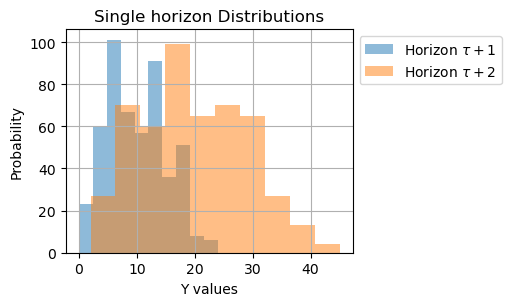

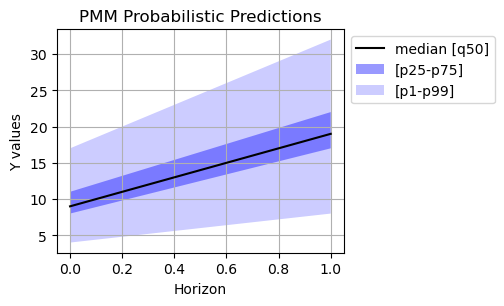

In [37]:
model = PMM(quantiles=[0.1, 0.40, 0.5, 0.60, 0.9])

samples, quants = model.sample(weights=weights,
                               lambdas=lambdas, num_samples=500)

print('samples.shape (N,H,num_samples) ', samples.shape)
print('quants.shape  (N,H,Q) \t\t', quants.shape)

# Plot synthethic data
x_plot = range(quants.shape[1]) # H length
y_plot_hat = quants[0,:,:]  # Filter N,G,T -> H,Q
samples_hat = samples[0,:,:]  # Filter N,G,T -> H,num_samples

# Kernel density plot for single forecast horizon \tau = t+1
fig, ax = plt.subplots(figsize=(3.7, 2.9))

ax.hist(samples_hat[0,:], alpha=0.5, label=r'Horizon $\tau+1$')
ax.hist(samples_hat[1,:], alpha=0.5, label=r'Horizon $\tau+2$')
ax.set(xlabel='Y values', ylabel='Probability')
plt.title('Single horizon Distributions')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.grid()
plt.show()
plt.close()

# Plot simulated trajectory
fig, ax = plt.subplots(figsize=(3.7, 2.9))
plt.plot(x_plot, y_plot_hat[:,2], color='black', label='median [q50]')
plt.fill_between(x_plot,
                 y1=y_plot_hat[:,1], y2=y_plot_hat[:,3],
                 facecolor='blue', alpha=0.4, label='[p25-p75]')
plt.fill_between(x_plot,
                 y1=y_plot_hat[:,0], y2=y_plot_hat[:,4],
                 facecolor='blue', alpha=0.2, label='[p1-p99]')
ax.set(xlabel='Horizon', ylabel='Y values')
plt.title('PMM Probabilistic Predictions')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.grid()
plt.show()
plt.close()

## Gaussian Mixture Mesh

In [38]:
#| export
class GMM:

    def __init__(self, level=[80, 90], quantiles=None):
        """ Gaussian Mixture Mesh

        This Gaussian Mixture statistical model assumes independence across groups of 
        data $\mathcal{G}=\{[g_{i}]\}$, and estimates relationships within the group.

        $$ P\\left(\mathbf{y}_{[b][t+1:t+H]}\\right) = 
        \prod_{ [g_{i}] \in \mathcal{G}} P\left(\mathbf{y}_{[g_{i}][\\tau]}\\right)=
        \prod_{\\beta\in[g_{i}]}
        \\left(\sum_{k=1}^{K} w_k \prod_{(\\beta,\\tau) \in [g_i][t+1:t+H]} 
        \mathrm{Gaussian}(y_{\\beta,\\tau}, \hat{\mu}_{\\beta,\\tau,k}, \sigma_{\\beta,\\tau,k})\\right)$$

        **References:**<br>
        [Kin G. Olivares, O. Nganba Meetei, Ruijun Ma, Rohan Reddy, Mengfei Cao, Lee Dicker. Probabilistic Hierarchical Forecasting with Deep Poisson Mixtures. Submitted to the International Journal Forecasting, Working paper available at arxiv.](https://arxiv.org/pdf/2110.13179.pdf)
        """
        # Transform level to MQLoss parameters
        if level:
            qs, self.output_names = level_to_outputs(level)
            self.quantiles = torch.Tensor(qs)

        # Transform quantiles to homogeneus output names
        if quantiles is not None:
            _, self.output_names = quantiles_to_outputs(quantiles)
            self.quantiles = torch.Tensor(quantiles)
        
        # Depends on the model
        self.outputsize_multiplier = len(self.output_names)
        
    def sample(self, weights, means, stds, num_samples=500):
        B, H, K = means.size()
        Q = len(self.quantiles)
        assert means.shape == stds.shape
        
        # Sample K ~ Mult(weights)
        # shared across B, H
        # weights = torch.repeat_interleave(input=weights, repeats=H, dim=2)

        # Avoid loop, vectorize
        weights = weights.reshape(-1, K)
        means = means.flatten()
        stds = stds.flatten()

        # Vectorization trick to recover row_idx
        sample_idxs = torch.multinomial(input=weights, 
                                        num_samples=num_samples,
                                        replacement=True)
        aux_col_idx = torch.unsqueeze(torch.arange(B*H),-1) * K

        # To device
        sample_idxs = sample_idxs.to(means.device)
        aux_col_idx = aux_col_idx.to(means.device)

        sample_idxs = sample_idxs + aux_col_idx
        sample_idxs = sample_idxs.flatten()

        sample_means = means[sample_idxs]
        sample_stds  = stds[sample_idxs]

        # Sample y ~ Normal(mu, std) independently
        samples = torch.normal(sample_means, sample_stds).to(means.device)
        samples = samples.view(B*H, num_samples)

        # Compute quantiles
        quantiles_device = self.quantiles.to(means.device)
        quants = torch.quantile(input=samples, q=quantiles_device, dim=1)
        quants = quants.permute((1,0)) # Q, B*H

        # Final reshapes
        samples = samples.view(B, H, num_samples)
        quants  = quants.view(B, H, Q)

        return samples, quants        
    
    def neglog_likelihood(self,
                          y: torch.Tensor,
                          weights: torch.Tensor,
                          means: torch.Tensor,
                          stds: torch.Tensor,
                          mask: torch.Tensor=None):

        if mask is None: 
            mask = torch.ones_like(means)

        B, H, K = means.size()
        # eps  = 1e-10
        
        log  = -0.5 * ((1/stds)*(y - means))**2\
                - torch.log(((2*math.pi)**(0.5)) * stds)

        #log  = torch.sum(log, dim=0, keepdim=True) # Joint within batch/group
        #log  = torch.sum(log, dim=1, keepdim=True) # Joint within horizon

        # Numerical stability mixture and loglik
        log_max = torch.amax(log, dim=2, keepdim=True) # [1,1,K] (collapsed joints)
        lik     = weights * torch.exp(log-log_max)     # Take max
        loglik  = torch.log(torch.sum(lik, dim=2, keepdim=True)) + log_max # Return max
        
        loglik  = loglik * mask #replace with mask

        loss = -torch.mean(loglik)
        return loss
    
    def __call__(self, y: torch.Tensor,
                 weights: torch.Tensor,
                 means: torch.Tensor,
                 stds: torch.Tensor,
                 mask: torch.Tensor=None):

        return self.neglog_likelihood(y=y, weights=weights,
                                 means=means, stds=stds, mask=mask)

In [39]:
# Create single mixture and broadcast to N,H,K
means   = torch.Tensor([[5,10,15], [10,20,30]])[None, :, :]

# # Create repetitions for the batch dimension N.
N=2
means = torch.repeat_interleave(input=means, repeats=N, dim=0)
weights = torch.ones_like(means)
stds  = torch.ones_like(means)

print('weights.shape (N,H,K) \t', weights.shape)
print('means.shape (N,H,K) \t', means.shape)
print('stds.shape (N,H,K) \t', stds.shape)

weights.shape (N,H,K) 	 torch.Size([2, 2, 3])
means.shape (N,H,K) 	 torch.Size([2, 2, 3])
stds.shape (N,H,K) 	 torch.Size([2, 2, 3])


samples.shape (N,H,num_samples)  torch.Size([2, 2, 2000])
quants.shape  (N,H,Q) 		 torch.Size([2, 2, 5])


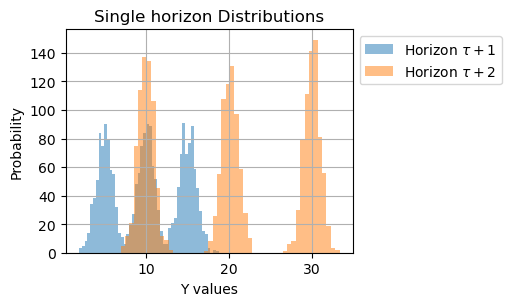

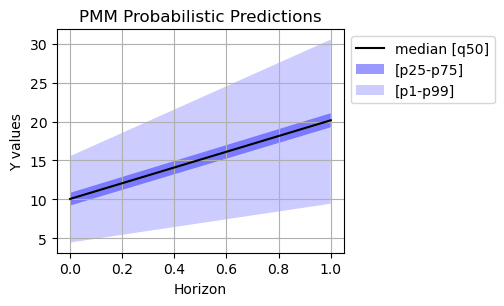

In [40]:
model = GMM(quantiles=[0.1, 0.40, 0.5, 0.60, 0.9])

samples, quants = model.sample(weights=weights,
                               means=means, stds=stds,
                               num_samples=2000)

print('samples.shape (N,H,num_samples) ', samples.shape)
print('quants.shape  (N,H,Q) \t\t', quants.shape)

# Plot synthethic data
x_plot = range(quants.shape[1]) # H length
y_plot_hat = quants[0,:,:]  # Filter N,G,T -> H,Q
samples_hat = samples[0,:,:]  # Filter N,G,T -> H,num_samples

# Kernel density plot for single forecast horizon \tau = t+1
fig, ax = plt.subplots(figsize=(3.7, 2.9))

ax.hist(samples_hat[0,:], alpha=0.5, bins=50,
        label=r'Horizon $\tau+1$')
ax.hist(samples_hat[1,:], alpha=0.5, bins=50,
        label=r'Horizon $\tau+2$')
ax.set(xlabel='Y values', ylabel='Probability')
plt.title('Single horizon Distributions')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.grid()
plt.show()
plt.close()

# Plot simulated trajectory
fig, ax = plt.subplots(figsize=(3.7, 2.9))
plt.plot(x_plot, y_plot_hat[:,2], color='black', label='median [q50]')
plt.fill_between(x_plot,
                 y1=y_plot_hat[:,1], y2=y_plot_hat[:,3],
                 facecolor='blue', alpha=0.4, label='[p25-p75]')
plt.fill_between(x_plot,
                 y1=y_plot_hat[:,0], y2=y_plot_hat[:,4],
                 facecolor='blue', alpha=0.2, label='[p1-p99]')
ax.set(xlabel='Horizon', ylabel='Y values')
plt.title('PMM Probabilistic Predictions')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.grid()
plt.show()
plt.close()